In [ ]:
'''
У нас есть данные о продажах в магазине подарков на все случаи жизни. Мы знаем что среди покупателей есть оптовики, но какая доля не знаем.
Задание - общее представление о товарах и пользователях, отчистить данные если необходимо. Построить базовые визуализации, 
отражающие динамику количества пользователей, выручки. Проанализировать товары АВС анализом, XYZ. Построить RFM анализ. 
Посмотреть ретеншен какой-либо группы.'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Укажем путь к нашему файлу
path_data = r'E:\Загрузки\archive\data.csv' 
# Читаем файл data.csv
df_sales = pd.read_csv(path_data, encoding='ISO-8859-1')
df_sales.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
# Посмотрим типы данных столбцов, и количество заполненых (не нулевых) значений в каждом столбике
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# Как видим у нас есть Nan в колонках Description и CustomerID
# Колонка InvoiceDate нужно преобразовать в тип дата, InvoiceNo необходимо преобразовать в числовой тип 
# CustomerID нужно преобразовать в целочисленный тип

In [4]:
# Проверим пустые, 0, или Nan значений в каждом столбце
# Запустим цикл по столбцам, с проверкой типа данных столбца, чтоб не считать ячейки ==0 в object столбиках
data_list = []       # список словарей для заполнения данных по каждому стоблцу
for col in df_sales.columns:
    is_numeric = np.issubdtype(df_sales[col].dtype, np.number)         #является ли тип данных столбца числовым
    Nan_count = df_sales[col].isna().sum()                             #сумма Nan значений
    Null_count = (df_sales[col]==0).sum() if is_numeric else 'not_num' #сумма 0 значений если тип числовой
    Negative = (df_sales[col]<0).sum() if is_numeric else 'not_num'    #сумма значений меньше 0
    Empty_count = (df_sales[col]=='').sum()                            #сумма пустых значений
    data_list.append({'name' : col, 'Nan_count' : Nan_count, 'Null_count' : Null_count,\
                      'Empty_count' : Empty_count, 'Negative' : Negative}) #словарь со столбцами и значениями
tabl_info = pd.DataFrame(data_list)
tabl_info

,name,Nan_count,Null_count,Empty_count,Negative
0,InvoiceNo,0,not_num,0,not_num
1,StockCode,0,not_num,0,not_num
2,Description,1454,not_num,0,not_num
3,Quantity,0,0,0,10624
4,InvoiceDate,0,not_num,0,not_num
5,UnitPrice,0,2515,0,2
6,CustomerID,135080,0,0,0
7,Country,0,not_num,0,not_num


In [6]:
# Description, CustomerID как видим содержат Nan значения которые в данном случае мы удалим
# кроме того UnitPrice содержит 0 и отрицательные значения, (вероятно это могуть быть возвраты) которые мы удалим 
# Quantity - также имеет отрицательные значения, также удалим их.

In [5]:
# Удалим строки со зачениями  Nan в столбиках 'Description', 'CustomerID'
df_sales = df_sales.dropna(subset=['Description', 'CustomerID'])

In [6]:
# Удалим строки с 0 значениями и отрицательными в столбиках 'Quantity', 'UnitPrice'
df_sales = df_sales.loc[ ~((df_sales['UnitPrice']<=0)|(df_sales['Quantity']<=0))]

In [7]:
# Проверим наши данные еще раз
data_list = []       
for col in df_sales.columns:
    is_numeric = np.issubdtype(df_sales[col].dtype, np.number)        
    Nan_count = df_sales[col].isna().sum()                             
    Null_count = (df_sales[col]==0).sum() if is_numeric else 'not_num' 
    Negative = (df_sales[col]<0).sum() if is_numeric else 'not_num'
    Empty_count = (df_sales[col]=='').sum()                            
    data_list.append({'name' : col, 'Nan_count' : Nan_count, 'Null_count' : Null_count,\
                      'Empty_count' : Empty_count, 'Negative' : Negative}) 
tabl_info = pd.DataFrame(data_list)
tabl_info

,name,Nan_count,Null_count,Empty_count,Negative
0,InvoiceNo,0,not_num,0,not_num
1,StockCode,0,not_num,0,not_num
2,Description,0,not_num,0,not_num
3,Quantity,0,0,0,0
4,InvoiceDate,0,not_num,0,not_num
5,UnitPrice,0,0,0,0
6,CustomerID,0,0,0,0
7,Country,0,not_num,0,not_num


In [8]:
# Преобразуем сттолбцы в соответствующие типы данных
df_sales = df_sales.astype({'InvoiceNo' : 'int64', 'CustomerID' : 'int64'}) #приводим столбики 'InvoiceNo'  'CustomerID' к целым числам
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'], format='%m/%d/%Y %H:%M') #столбец с датой приводим с указанием формата
df_sales.info() #проверяем нашу работу

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 27.3+ MB


In [9]:
# После удаления строк пересчитаем индекс
df_sales = df_sales.reset_index(drop=True)
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [10]:
# Посмотрим статистические данные по столбикам
df_sales.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884,397884.000000,397884.000000
mean,560616.934451,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,536365.000000,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,549234.000000,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,561893.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,572090.000000,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,13106.117773,179.331775,NaN,22.097877,1713.141560


In [13]:
# У нас есть очень большие значения в столбиках Quantity, UnitPrice, попробуем понять выбросы это или
# оптовые закупки (которые по условиям присутствуют в данных, но какой объем не сказанно, поэтому установим его сами)

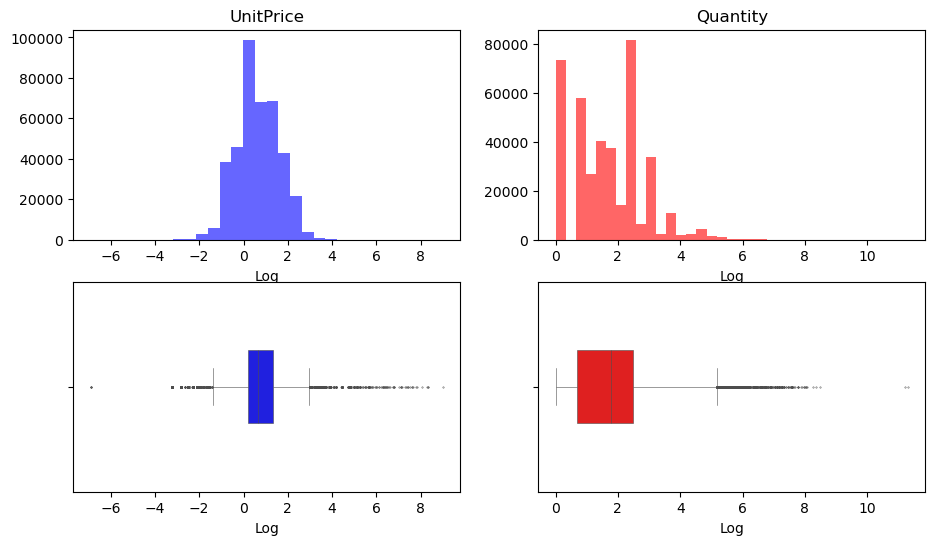

In [11]:
# Построим графики Hist Boxplot, с логарифмической шкалой, т.к. с такими большими выбросами данные будут искажены на обычной шкале
fig, ax = plt.subplots(2, 2, figsize=(11, 6)) #определяем фигуру и её размеры
UnitPrice_log = np.log(df_sales['UnitPrice']) #берем логарифм по столбику с данными UnitPrice
Quantity_log = np.log(df_sales['Quantity'])  #берем логарифм по столбику с данными Quantity
ax[0, 0].hist(UnitPrice_log, bins=30, color='blue', alpha=0.6)   #строим гистограмму 
ax[0, 0].set_xlabel('Log')
ax[0, 0].set_title('UnitPrice')
sns.boxplot(x=UnitPrice_log, ax=ax[1, 0], color='blue', width=0.35, linewidth=0.4, fliersize=0.35) #строим боксплот
ax[1, 0].set_xlabel('Log')
# Тоже самое для количества товара
ax[0, 1].hist(Quantity_log, bins=35,color='red', alpha=0.6)
ax[0, 1].set_xlabel('Log')
ax[0, 1].set_title('Quantity')
sns.boxplot(x=Quantity_log, ax=ax[1, 1], color='red', width=0.35, linewidth=0.4, fliersize=0.35)
ax[1, 1].set_xlabel('Log')
plt.show()

In [ ]:
'''Гистограмма  в лог.шкале для цены, показывает что в основном цена на товары примерно сосредоточена в диапозоне от 0,1 до 1000,
причем большее количество это диапозон от 1 до 10 примерно. На боксплот, много выбросов за границами как для больших цен 
так и для маленьких.
Гистограмма в лог.шкале для количества,показывает что товары с количеством (в покупке) в районе 1 штуки, стоят одельно от других товаров, 
что говорит о наличии категорий товаров, которые покупаются либо штучно 1-4, либо мелким оптом - 10, средним -100, либо
крупным 1000, или особо крупным оптом, т.е. можно выделить отдельные группы '''


In [12]:
# Посмотримкакое какое количество значений лежит за пределами квантилей

q_1_quantity = df_sales['Quantity'].quantile(0.25) #квантили для Quantity
q_3_quantity = df_sales['Quantity'].quantile(0.75)
IQR_quantity = q_3_quantity - q_1_quantity
low_bound_quantity = q_1_quantity - 1.5*IQR_quantity
upp_bound_quantity = q_3_quantity + 1.5*IQR_quantity

q_1_price = df_sales['UnitPrice'].quantile(0.25) #квантили для UnitPrice
q_3_price = df_sales['UnitPrice'].quantile(0.75)
IQR_price = q_3_price - q_1_price
low_bound_price = 0.01                    #если считать нижнюю границу 1.5*IQR_price то получим отрицательное значени
upp_bound_price = q_3_price + 1.5*IQR_price     #поэтому задаем значение ниж границы сами

count_upp_quantity = df_sales[df_sales['Quantity']>upp_bound_quantity].Quantity.count() #количество товаров с объемом покупки выше верх.границы
count_low_price = df_sales[df_sales['UnitPrice']<low_bound_price].UnitPrice.count()     #количество товаров с ценой ниже ниж.границы
count_upp_price = df_sales[df_sales['UnitPrice']>upp_bound_price].UnitPrice.count()     #верхняя граница по цене
print(
f'Выше верхней границы {upp_bound_quantity} в Quantity лежит:{count_upp_quantity} значений {100*(count_upp_quantity/df_sales['Quantity'].count()):.1f}%.\n'
f'Ниже нижней границы {low_bound_price} в UnitPrice лежит: {count_low_price} значений {100*(count_low_price/df_sales['UnitPrice'].count()):.1f}%.\n'
f'Выше верхней границы {upp_bound_price} в UnitPrice лежит: {count_upp_price} значений {100*(count_upp_price/df_sales['UnitPrice'].count()):.1f}%.\n')

Выше верхней границы 27.0 в Quantity лежит:25647 значений 6.4%.
Ниже нижней границы 0.01 в UnitPrice лежит: 4 значений 0.0%.
Выше верхней границы 7.5 в UnitPrice лежит: 34356 значений 8.6%.



In [17]:
# Для цены мы установили границу 0,01 ниже которой находится всего 4 значения менее 1 %- удалим эти значения как выбросы.
# Что касается верхней границы по цене то значения выше 7.5 удалим.
# А по количеству можно отнести заказы с более 27 шт к оптовым, в любом случае опт необходимо категоризировать.
# Мы просто отчистим наш датафрейм для работы с недорогими мелкооптовыми товарами.

In [18]:
# В столбике Description содержаться категориии 'POSTAGE|CARRIGE' 'DOTCOM POSTAGE|Manual' это обозначение доставки - удалим их.

In [13]:
# Отчищаем данные по границам и от доставки
mask_del = (((df_sales['UnitPrice']<low_bound_price)|\
             (df_sales['UnitPrice']>upp_bound_price))|\
            (df_sales['Quantity']>upp_bound_quantity)|\
            (df_sales['Description'].str.contains('DOTCOM POSTAGE|Manual|POSTAGE|CARRIGE')))
df_retail = df_sales.loc[~mask_del].reset_index(drop=True)

In [14]:
# Наш итоговый df
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [15]:
# Добавим колонку TotalPrice как сумму заказа
df_retail['TotalPrice'] = df_retail['Quantity']*df_retail['UnitPrice']
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [16]:
# Создадим df для дневной динамики количества пользователей
dau_df = df_retail[['InvoiceDate', 'CustomerID']].copy() 
dau_df['day'] = dau_df['InvoiceDate'].dt.floor('D')    # приводим дату к началу для
dau = dau_df.groupby('day').agg(count=('CustomerID', 'nunique')).reset_index() # группируем по дню - считаем уникальных пользователей

# Чтоб избежать пропусков в датах, сгенерируем непрерывный временной ряд между максимальной датой и минимальной
day_range = pd.date_range(start=dau['day'].min(), end=dau['day'].max(), freq='D')
day_range = pd.DataFrame({'day' : day_range}) # делаем df из ряда

# Джоиним по столбцу day который останется от левого df, а пропуски заполним 0
dau = day_range.merge(dau, on='day', how='left')
dau['count'] = dau['count'].fillna(0) 

In [17]:
# Создадим df для недельной динамики количества пользователей 
wau_df = df_retail[['InvoiceDate', 'CustomerID']].copy()
wau_df['week'] = wau_df['InvoiceDate'].dt.to_period('W-MON').dt.to_timestamp() # приводим дату к началу недели пнд.
wau = wau_df.groupby('week').agg(count=('CustomerID', 'nunique')).reset_index()

# Создадим df для месячной динамики количества пользователей
mau_df = df_retail[['InvoiceDate', 'CustomerID']].copy()
mau_df['month'] = mau_df['InvoiceDate'].dt.to_period('M').dt.to_timestamp() # приводим дату к началу месяца
mau = mau_df.groupby('month').agg(count=('CustomerID', 'nunique')).reset_index()

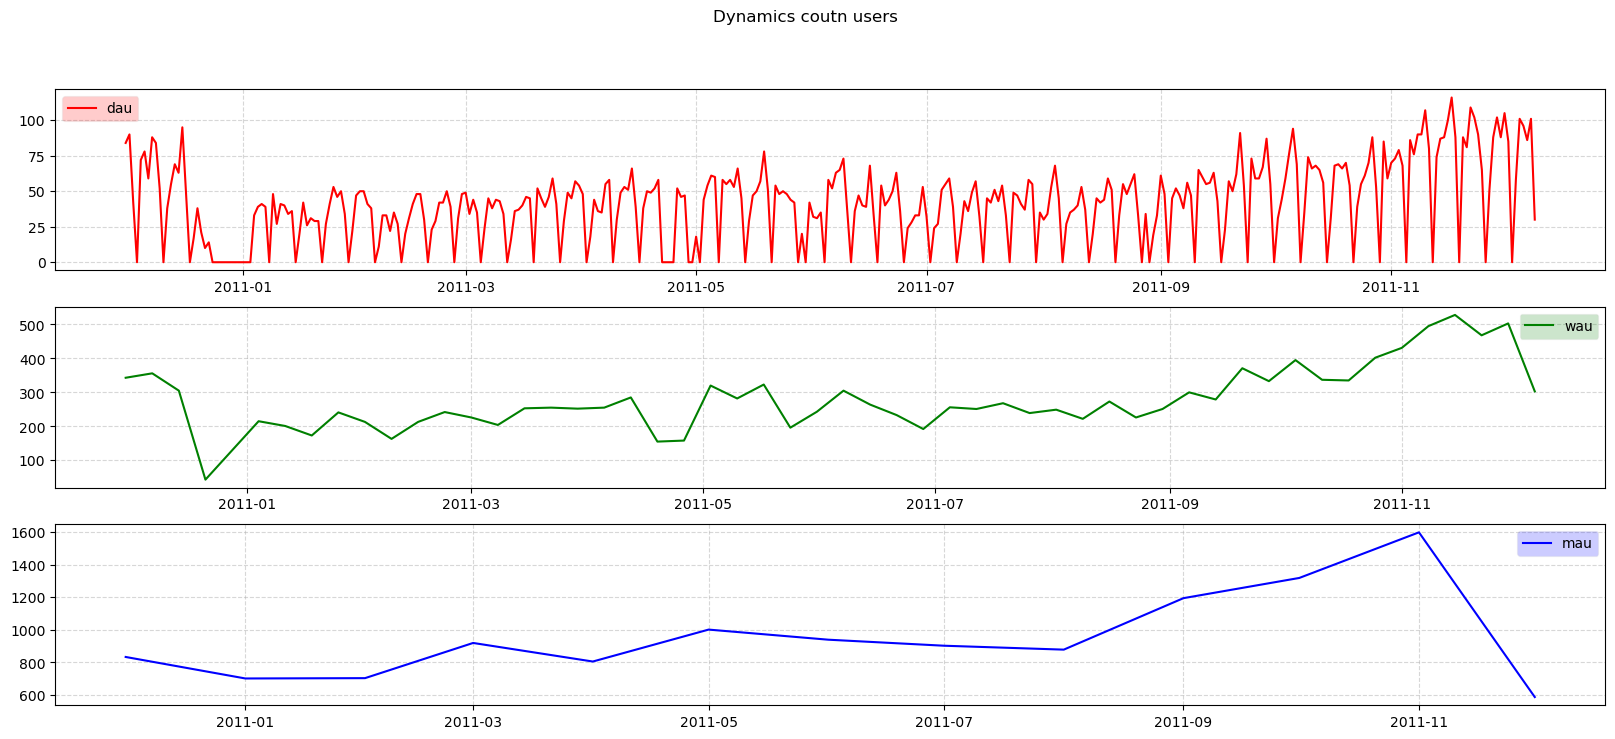

In [18]:
# Построим графики димнамики количества пользователей
fig, axis = plt.subplots(3, 1, figsize=(20, 8))
fig.suptitle('Dynamics coutn users')            # сделаем подпись все графикам общую
axis[0].plot(dau['day'], dau['count'], color='r', label='dau') 
axis[0].legend(facecolor='r', framealpha=0.2)   # легенда с заливкой и прозрачным фоном
axis[0].grid(True, linestyle='--', alpha=0.5)   # сетка, стиль, прозрачность
axis[1].plot(wau['week'], wau['count'], color='g', label='wau')
axis[1].legend(facecolor='g', framealpha=0.2)
axis[1].grid(True, linestyle='--', alpha=0.5)
axis[2].plot(mau['month'], mau['count'], color='b', label='mau')
axis[2].legend(facecolor='b', framealpha=0.2)
axis[2].grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
'''
Из графиков наглядно видно что в месячных, недельных и дневных посещениях есть определенная сезонность осенью.
Дневной график также показывает что покупки совершаются не ежедневно. Также примерно можно понять средний объем пользователей.
Дневная аудитория это примерно 45 человек, недельная 240, месечная 850'''

In [19]:
# Посмотрим какой процент месячных пользователей заходит в неделю т.е. wau/mau

wau['month'] = wau['week'].dt.to_period('M').dt.to_timestamp() # в недельном df сделаем колонку с датами приведенными к началу месяца
wau_mau = wau.merge(mau, on='month', how='inner', suffixes=('_w', '_m')) # к недельной динамике присоединим месячную 
wau_mau['ratio'] = wau_mau['count_w']/wau_mau['count_m'] # получим необходимый столбик
wau_mau.head() # посмотрим результат

,week,count_w,month,count_m,ratio
0,2010-12-07,356,2010-12-01,833,0.427371
1,2010-12-14,305,2010-12-01,833,0.366146
2,2010-12-21,43,2010-12-01,833,0.051621
3,2011-01-04,215,2011-01-01,701,0.306705
4,2011-01-11,201,2011-01-01,701,0.286733


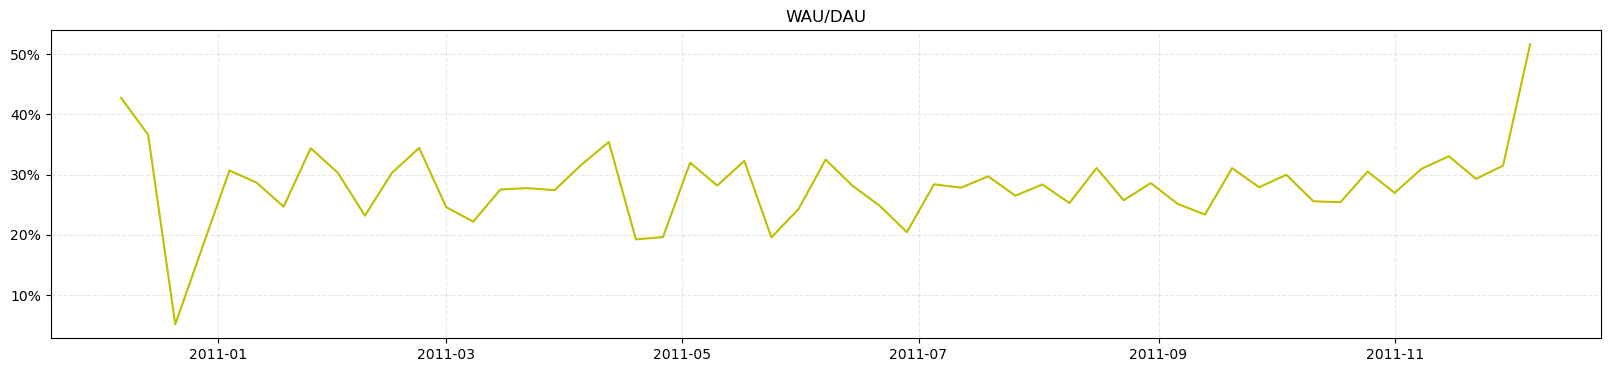

In [20]:
# Рисием график wau/mau
from matplotlib.ticker import FuncFormatter # для создания кастомного формата оси У
formatter = FuncFormatter(lambda x, pos: f'{x:.0%}')  # функция которая сделает из значений оси у нужный формат
fig, axis = plt.subplots(figsize=(20, 4))
axis.plot(wau_mau['week'], wau_mau['ratio'], color='y')
axis.yaxis.set_major_formatter(formatter)            # применяем кастомный формат
axis.grid(True, linestyle='--', alpha=0.3)
axis.set_title('WAU/DAU')
plt.show()

In [ ]:
'''Примерно 30% пользователей от месячного объема приходят за неделю, и при этом осенью эт цифры более стабильнее'''

In [21]:
# Для графика выручки по месяцам и неделям создадим необходимые датафреймы
week_df = df_retail[['InvoiceDate', 'TotalPrice']].copy()                    # берем копию исходного df с нужными колонками    
week_df['week_date'] = week_df['InvoiceDate'].dt.to_period('W').dt.to_timestamp() # создаем колонку даты с недельным интервалом
week_revenue = week_df.groupby('week_date').agg(total_sum=('TotalPrice', 'sum')).reset_index() # группируем получаем сумму в неделю
# Тоже самое для месяцев
month_df = df_retail[['InvoiceDate', 'TotalPrice']].copy()
month_df['month'] = month_df['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
month_revenue = month_df.groupby('month').agg(total_sum=('TotalPrice', 'sum')).reset_index()

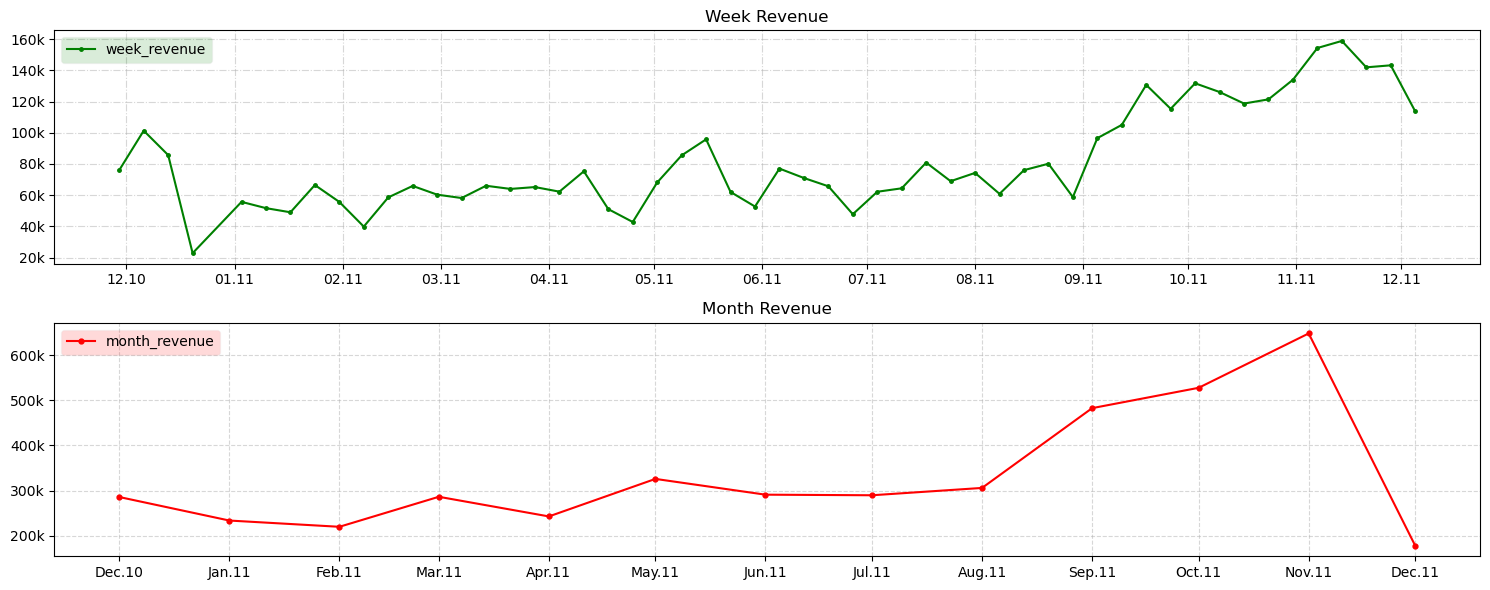

In [23]:
# Строим графики выручки
import matplotlib.dates as mdates           # для форматирования осей, по количеству и формату чисел
from matplotlib.ticker import FuncFormatter # для создания кастомного формата оси У

fig, axis = plt.subplots(2, 1, figsize=(15, 6))
axis[0].plot(week_revenue['week_date'], week_revenue['total_sum'], color='g', label='week_revenue', marker='o', markersize=2.5)
axis[0].set_title('Week Revenue')
axis[0].legend(facecolor='g', framealpha=0.15)
axis[0].grid(True, linestyle='-.', alpha=0.5)                    # сетка на графике 
axis[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # делаем метки на оси ОХ каждый месяц
axis[0].xaxis.set_major_formatter(mdates.DateFormatter('%m.%y')) # формат месяц.год
formatter = FuncFormatter(lambda x, pos: f'{x/1000:.0f}k')       # кастомный формат оси ОУ, числа делим на 1000 для удобства
axis[0].yaxis.set_major_formatter(formatter)                     # применяем формат к оси
axis[1].plot(month_revenue['month'], month_revenue['total_sum'], color='r', label='month_revenue',  marker='o', markersize=3.5)
axis[1].set_title('Month Revenue')
axis[1].legend(facecolor='r', framealpha=0.15)
axis[1].grid(True, linestyle='--', alpha=0.5)
axis[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axis[1].xaxis.set_major_formatter(mdates.DateFormatter('%b.%y'))
axis[1].yaxis.set_major_formatter(formatter)
plt.tight_layout()

In [24]:
# Посмотрим распределение продаж по товарам 
prodact = df_retail[['Description', 'TotalPrice']].groupby('Description', as_index=False).agg(sum_prodact=('TotalPrice', 'sum'))

In [25]:
# Отсортируем значения по убыванию, пересчитаем индекс
prodact = prodact.sort_values(by='sum_prodact', ascending=False).reset_index(drop=True)
# Берем только первые top-20 
top_prodact = prodact[prodact.index < 20]

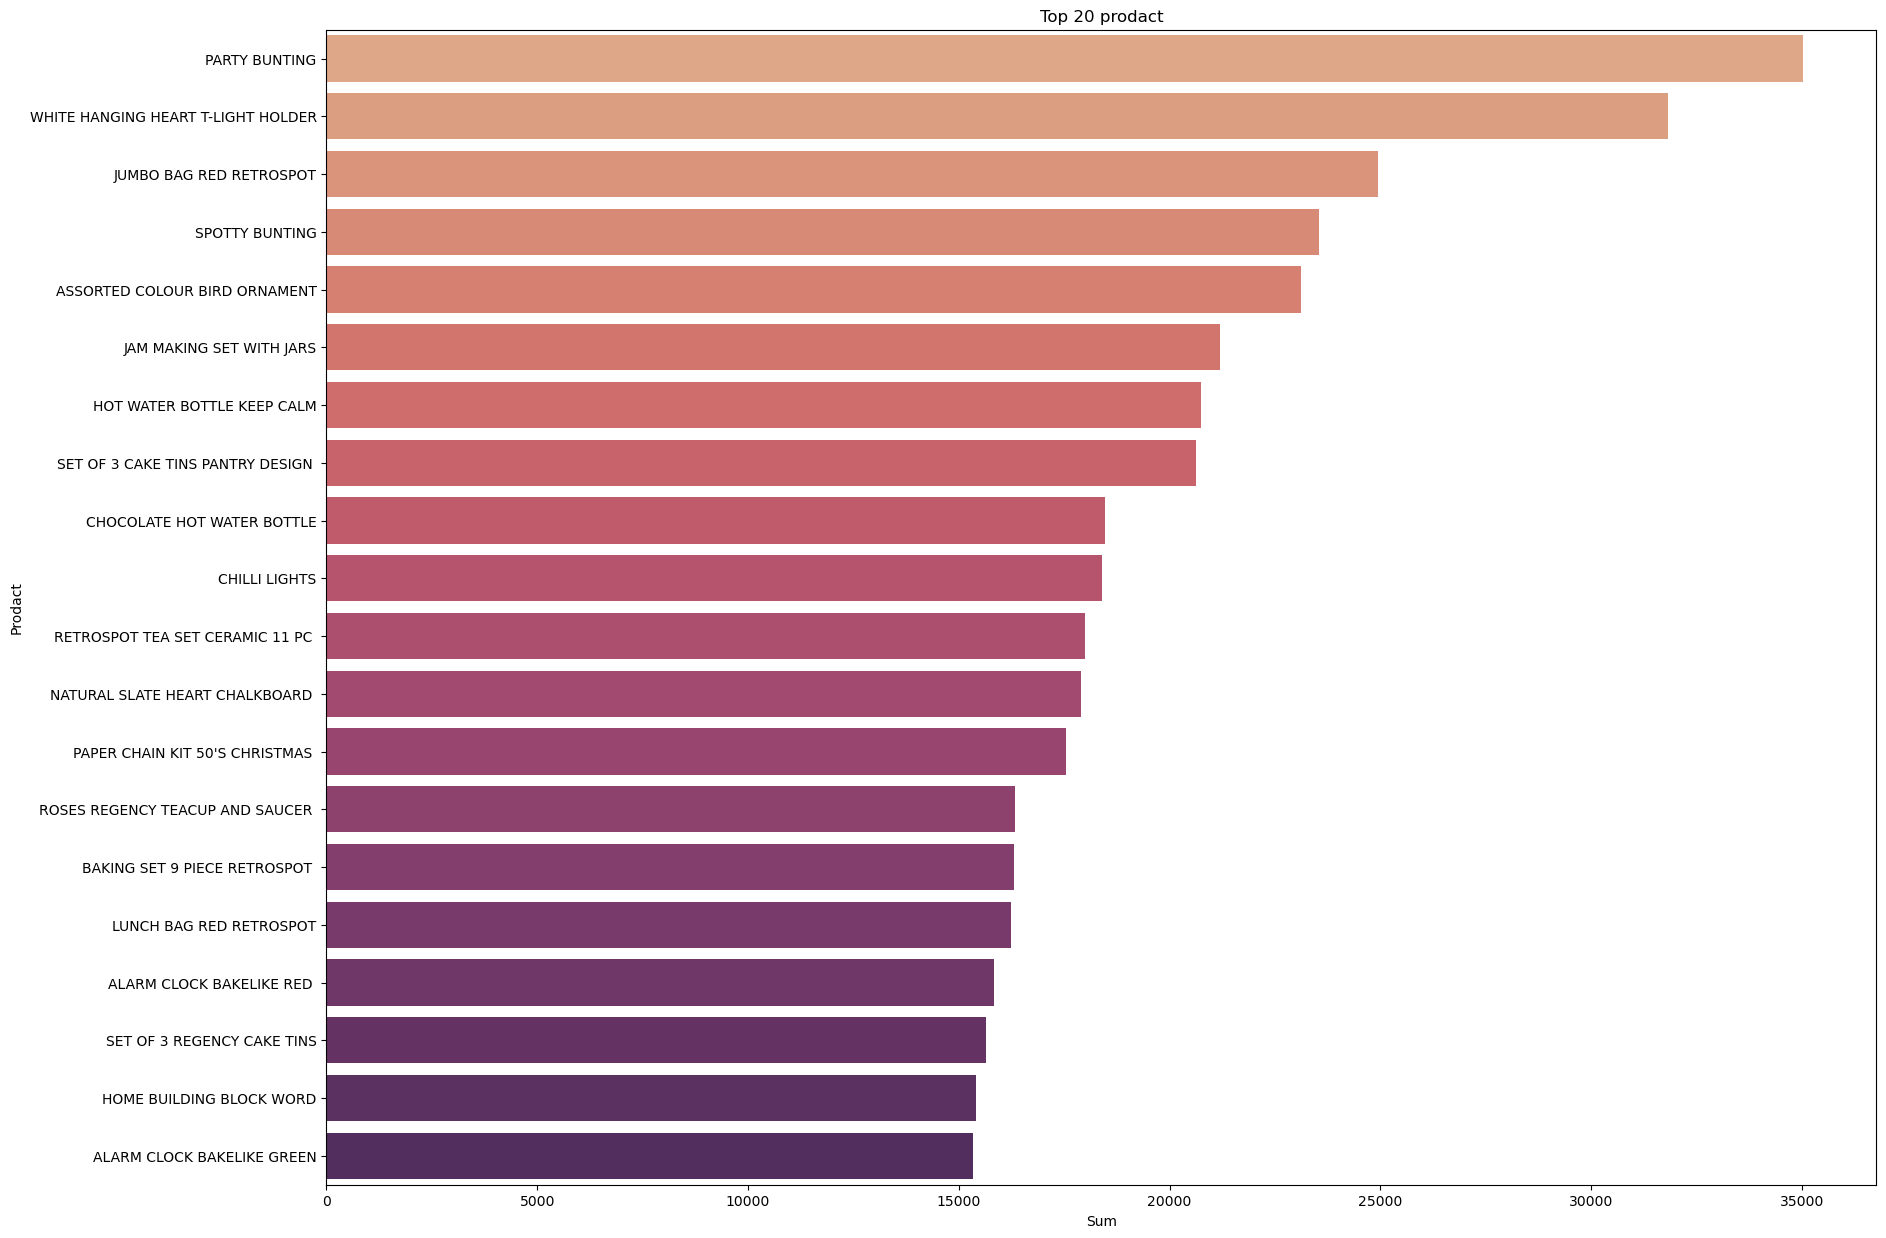

In [33]:
# Строим топ 20 товаров по сумме продаж
plt.figure(figsize=(20, 15)) #определяем фигуру
sns.barplot(x='sum_prodact', y='Description', hue='Description', data=top_prodact, palette='flare', legend=False)#убираем легенду чтоб названия были на
plt.xlabel('Sum')                                                                                                 #оси У
plt.ylabel('Prodact')
plt.title('Top 20 prodact')
plt.show()

In [27]:
# Наша табличка с товарами и суммой их выручки
prodact.head()

,Description,sum_prodact
0,PARTY BUNTING,35011.95
1,WHITE HANGING HEART T-LIGHT HOLDER,31819.81
2,JUMBO BAG RED RETROSPOT,24929.74
3,SPOTTY BUNTING,23542.75
4,ASSORTED COLOUR BIRD ORNAMENT,23107.37


In [28]:
# Построим на товары в разрезе АВС анализа, построим кривую Лоренца

total_sum = prodact['sum_prodact'].sum()              # считаем общую сумму по всем товарам
prodact['share'] = prodact['sum_prodact']/total_sum   # считаем долю суммы каждого товара от общей суммы - делаем столбик
prodact['cum_share'] = prodact['share'].cumsum()      # столбик кумулятивной долей
prodact['group'] = np.where(prodact['cum_share'] <= 0.8, 'A',          # присвоим категорию каждому товару в зависимости от уровня кумулятивной суммы
                           np.where(prodact['cum_share'] <= 0.95, 'B', 'C'))

prodact.head()

,Description,sum_prodact,share,cum_share,group
0,PARTY BUNTING,35011.95,0.008108,0.008108,A
1,WHITE HANGING HEART T-LIGHT HOLDER,31819.81,0.007369,0.015477,A
2,JUMBO BAG RED RETROSPOT,24929.74,0.005773,0.021250,A
3,SPOTTY BUNTING,23542.75,0.005452,0.026702,A
4,ASSORTED COLOUR BIRD ORNAMENT,23107.37,0.005351,0.032053,A


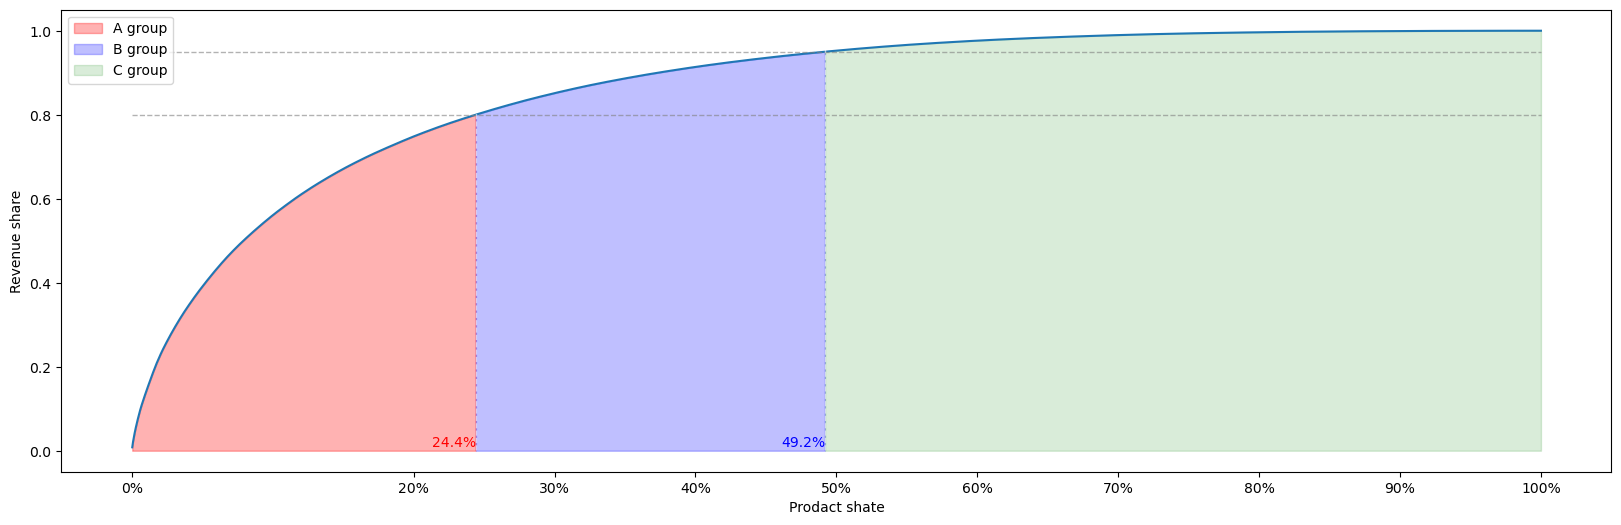

In [29]:
# Рисуем график кривой Лоренца
plt.figure(figsize=(20, 6))
x = np.arange(1, len(prodact)+1)/len(prodact) # ось Х - кумулятивная доля товаров от общего числа (все товары=100%)
plt.plot(x, prodact['cum_share'])             # график - по оси Х доля товаров, по У доля выручки.
plt.xlabel('Prodact shate')                   # подписи осей
plt.ylabel('Revenue share')                   # подписи осей

# Заполнение цветом, между графиком и осью Х, по условию условие - булева маска
plt.fill_between(x, prodact['cum_share'], 0, where=(prodact['group']=='A'), color='red', alpha=0.3, label='A group')  
plt.fill_between(x, prodact['cum_share'], 0, where=(prodact['group']=='B'), color='blue', alpha=0.25, label='B group')  
plt.fill_between(x, prodact['cum_share'], 0, where=(prodact['group']=='C'), color='green', alpha=0.15, label='C group') 

# Две горизонтальные линии на точках 0.8 0.95
plt.hlines(y=[0.8, 0.95], xmin=0, xmax=1, color='grey', linestyle='--', linewidth=1, alpha=0.6)  

# Значение на оси Х, где происходит смена групп А и В, получается как индекс первого значения >0.8
x_line1 = x[np.argmax(prodact['cum_share'] > 0.8)] 
# Значение на оси Х, где происходит смена групп В и С, получается как индекс первого значения >0.95
x_line2 = x[np.argmax(prodact['cum_share'] > 0.95)] 

plt.axvline(x=x_line1, color='w', linestyle='--', linewidth=1, alpha=0.6) # вертикальная линия на границе А и В
plt.axvline(x=x_line2, color='w', linestyle='--', linewidth=1, alpha=0.6) # вертикальная линия на границе В и С

# Подпись значений границы А и В, В и С, на графике
plt.text(x=x_line1,                        # координата по оси Х 
        y=0.01,                            # координата по оси Y
        s=f'{x_line1:.1%}',                # сама подпись %
        ha='right',                        # выравнивание горизонтальное
        color='red')                       # цвет текста
plt.text(x=x_line2,
        y=0.01, 
        s=f'{x_line2:.1%}',
        ha='right',
        color='blue')
plt.xticks([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],                        # значения на оси Х
            ['0%', '20%','30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])# соответствующие им подписи
plt.legend() # подписи легенды
plt.show()

In [ ]:
'''
Из кривой Лоренца видно что 24% товаров составляют 80% всей выручки, следующие 25% товаров дают 15% выручки, а остальные 51% - лишь 5% выручки.
49% товаров дают 95% выручки.
Данный график можно рассматривать как основу для ворпосов по продвижению товарных групп, и целесообразности их продаж, расширению товарных групп
и диверсификации по группам'''

In [30]:
# Воспользуемся нашими данными из начальной таблицы чтоб узнать как товары распределены по стабильности спроса
# Для этого  рассчитаем коэффициент вариации sd/mean, и классифицируем товары
# Товары с коэффициентом <= 10% - стабильный спрос, <= 25% - сезонный спрос, > 25% - не стабильный спрос.
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [31]:
# Оставим нужные нам столбики из начальной таблицы, и добавим столбец с датой приведенной к началу периода - месяц
xyz_df = df_retail[['Description', 'InvoiceDate', 'Quantity']].copy()
xyz_df['month'] = xyz_df['InvoiceDate'].dt.to_period('M').dt.to_timestamp() # так дата будет в формате период, а timestamp - приведет к началу периода

In [32]:
# Получим количество продаж каждого товара в каждый месяц
# Для удобства сделаем сводную таблицу, с индексами как товар, и меяцами как колонки. Если продаж не было заполним 0 чтоб корректно считать sd
xyz_group = xyz_df.pivot_table(index='Description', columns='month', values='Quantity', aggfunc='sum', fill_value=0)

In [33]:
# Добавим колонку с коэффициентом вариации - который показывает как сильно количество продаж отклоняется от среднего
xyz_group['CV'] = round((xyz_group.std(axis=1)/xyz_group.mean(axis=1))*100)

In [34]:
# Посмотрим на нашу сводную таблицу, отсортированную по возрастанию CV
xyz_group.sort_values(by='CV', axis=0, ascending=True)

month,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,CV
Description,,,,,,,,,,,,,,
HANGING METAL HEART LANTERN,142,174,150,218,256,231,244,175,146,214,232,192,226,20.0
CREAM HEART CARD HOLDER,130,165,163,183,135,110,112,118,133,161,178,161,73,23.0
BATHROOM METAL SIGN,206,150,212,250,216,257,194,188,262,202,277,229,87,24.0
LUNCH BOX I LOVE LONDON,280,246,255,267,245,242,138,264,230,237,207,197,79,25.0
PLASTERS IN TIN CIRCUS PARADE,406,336,211,338,302,395,273,330,244,448,355,480,226,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BLUE LEAVES AND BEADS PHONE CHARM,1,0,0,0,0,0,0,0,0,0,0,0,0,361.0
PINK/WHITE GLASS DEMI CHOKER,2,0,0,0,0,0,0,0,0,0,0,0,0,361.0
FLAG OF ST GEORGE CAR FLAG,0,0,0,0,0,0,0,0,0,25,0,0,0,361.0


In [35]:
# Разделим данные на категории XYZ, в границах X - <=30%, Y - <=50%, Z - >50%
xyz_group['CV_group'] = np.where(xyz_group['CV']<=30, 'X', np.where(xyz_group['CV']<=50, 'Y', 'Z'))
xyz_group.head()

month,2010-12-01 00:00:00,2011-01-01 00:00:00,2011-02-01 00:00:00,2011-03-01 00:00:00,2011-04-01 00:00:00,2011-05-01 00:00:00,2011-06-01 00:00:00,2011-07-01 00:00:00,2011-08-01 00:00:00,2011-09-01 00:00:00,2011-10-01 00:00:00,2011-11-01 00:00:00,2011-12-01 00:00:00,CV,CV_group
Description,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,14,2,1,0,8,3,2,3,1,9,3,45,49,154.0,Z
50'S CHRISTMAS GIFT BAG LARGE,0,0,0,0,0,0,0,0,24,205,593,405,54,193.0,Z
DOLLY GIRL BEAKER,0,0,0,0,0,0,0,67,297,215,149,148,74,136.0,Z
I LOVE LONDON MINI BACKPACK,0,0,0,0,0,0,0,0,0,96,51,52,21,181.0,Z
I LOVE LONDON MINI RUCKSACK,0,0,0,0,0,0,0,0,0,0,1,0,0,361.0,Z


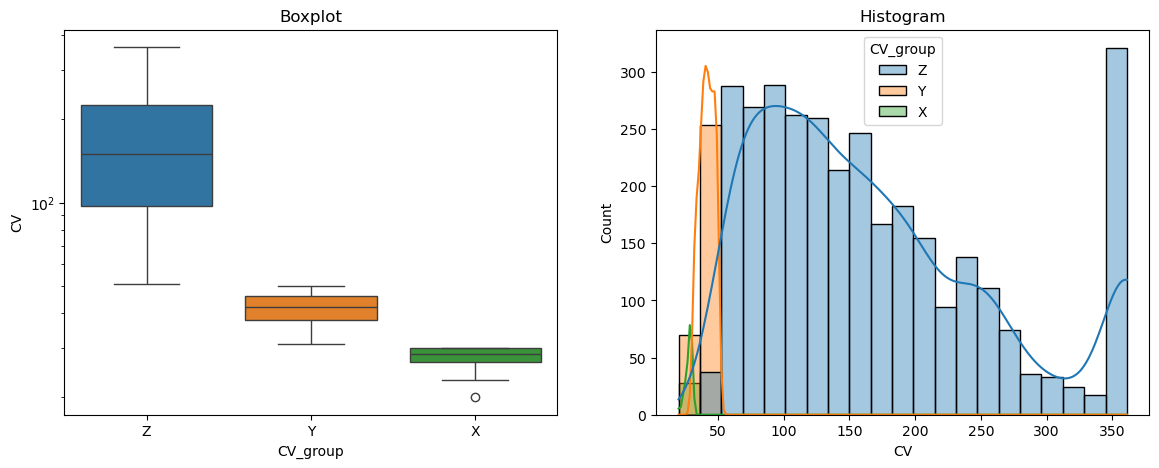

In [37]:
# Посмотрим как распределены данные разных групп товаров

fig, axis = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(x='CV_group', y='CV', data=xyz_group, hue='CV_group', ax=axis[0])
axis[0].set_yscale('log') # делаем лог-шкалу
axis[0].set_title('Boxplot')
sns.histplot(data=xyz_group, x='CV', hue='CV_group', alpha=0.4, kde=True, ax=axis[1])
axis[1].set_title('Histogram')
plt.show()

In [ ]:
'''
Как можно увидеть больше всего товаров в группе Z, при этом в этой группе наиболее частые товары с экстремально высокой нестабильностью -
буквально эти товары продаются раз в год. Группы X и Y, в данных условиях включают очень узкие диапозон данных, при 
этом товары группы Y, где условно спрос имеет среднюю стабильность, встречаются относительно часто, а вот товары группы X - ограчиченно.'''

In [38]:
# Посмотрим какаю долю товаров составляет каждая из групп XYZ
total_count = xyz_group['CV_group'].count()
share_xyz = xyz_group.groupby(['CV_group'], as_index=False).agg(count=('CV', 'count'))
share_xyz['share'] = round((share_xyz['count']/total_count)*100, 1)
share_xyz

,CV_group,count,share
0,X,28,0.8
1,Y,324,9.1
2,Z,3219,90.1


In [ ]:
'''
Более 90% товаров имеют нестабильный (или крайне не стабильный) спрос, и только 0,8% стабильный. Можно предположить,
что поскольку выручка распределена по месяцам относительно равномерно, а товаров у нас более 3500, поэтому такая высокая
вариация почти у всех товаров вполне вероятна. А выручка выравнивается за счет товаров группы X, Y - которые стабильно приносят денежный поток.'''

In [39]:
# Посмотрим также на количество товаров, одновременно в группах  ABC XYZ, для этого соединим таблицы prodact (ABC) и xyz_group
CV_group =  xyz_group.reset_index()[['Description', 'CV_group']] # берем только нужные поля и пересчитывает индекс
df_xyz_abc = pd.merge(prodact, CV_group, on='Description', how='inner') # соединяем по полю 'Description'
df_xyz_abc # смотрим результат

,Description,sum_prodact,share,cum_share,group,CV_group
0,PARTY BUNTING,35011.95,8.107988e-03,0.008108,A,Z
1,WHITE HANGING HEART T-LIGHT HOLDER,31819.81,7.368759e-03,0.015477,A,X
2,JUMBO BAG RED RETROSPOT,24929.74,5.773173e-03,0.021250,A,Y
3,SPOTTY BUNTING,23542.75,5.451977e-03,0.026702,A,Z
4,ASSORTED COLOUR BIRD ORNAMENT,23107.37,5.351152e-03,0.032053,A,Y
...,...,...,...,...,...,...
3566,VINTAGE BLUE TINSEL REEL,0.84,1.945253e-07,0.999999,C,Z
3567,MINT KITCHEN SCALES,0.76,1.759991e-07,1.000000,C,Z
3568,SET 12 COLOURING PENCILS DOILEY,0.65,1.505255e-07,1.000000,C,Z
3569,HEN HOUSE W CHICK IN NEST,0.42,9.726265e-08,1.000000,C,Z


In [40]:
# Для удобства построит сводную таблицу и у нас получится матрица категорий
matrics = df_xyz_abc.pivot_table(index='group', columns='CV_group', values='Description', aggfunc='count', fill_value=0)
total_count_prod = matrics.sum().sum() # cчитаем сумму всех товаров
matrics = round((matrics/total_count_prod)*100, 1) # выражаем количество в процентах
matrics

CV_group,X,Y,Z
group,,,
A,0.7,6.9,16.7
B,0.1,2.0,22.7
C,0.0,0.1,50.7


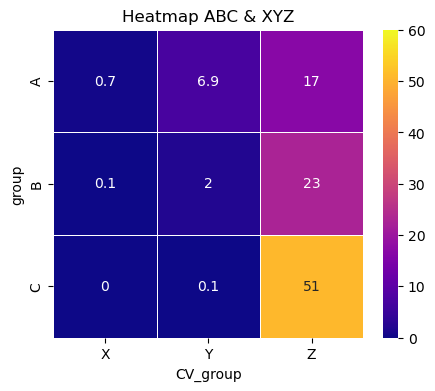

In [41]:
# Изобразим нашу матрицу в цвете с помощью heatmap
plt.figure(figsize=(5,4))
sns.heatmap(data=matrics, annot=True, linewidths=0.5, cmap='plasma', vmin=0, vmax=60)
plt.title('Heatmap ABC & XYZ')
plt.show()

In [ ]:
'''
 Как мы видим половина товаров принадлежит группе C-Z - т.е. товары приносящие незначительное количество прибыли (5%) с максимально 
не предсказуемым спросом. Для магазина подарков на все случаи такое вполне вероятно, но если есть возможности расширять более доходные группы,
эту группу можно уменьшать или оптимизировать, или искать пути повышения доходности от продаж (увеличивать минимальные партии к примеру).
 Товары приносящие 80% все прибыли, сосредоточены в группе нестабильного спроса - 17% товаров, и только 0,7% этой группы имеют устойчивый
спрос - а это повод подумать над вопросом расширения товарных групп АХ АУ ВХ ВУ. 
'''

In [42]:
# Проведем RFM анализ пользователей, чтоб понять какие пользователи как часто и в каком количестве покупают
import datetime as dt
current_date = df_retail['InvoiceDate'].max() + dt.timedelta(days=1) # делаем дату на один день больше чем максимальная в данных
RFM_df = (df_retail.groupby('CustomerID', as_index=False)            # группируем данные по пользователям
        .agg(
            Recency=('InvoiceDate', lambda x: (current_date-x.max()).days),     # создаем столбец с количством дней от последней покупки
             Frequency=('InvoiceNo', 'nunique'),                                # количество покупок
             Monetary=('TotalPrice', 'sum')))                                   # итоговая сумма покупок
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12347,2,7,3314.73
1,12348,249,3,90.20
2,12349,19,1,999.15
3,12350,310,1,294.40
4,12352,36,7,1130.94


In [ ]:
'''
Для анализа нам нужно присвоить оценку каждому пользователю по каждому критерию RFM в зависимости от значения
Чтоб присвоить оценку нужно каждый критерий разбить на группы по интервалам, мы разобъем на квантили и в зависимости 
от того какое значение у конкретного пользователя он попадает в группу 1, 2, 3, 4.
Если много одинаковых значений, в столбике, например количество покупок, то одинаковые значения попадут согласно квантилей в одну группу,
исказив положение пользователя относительно друг  друга, учитывая две другие оценки по сумме и давности покупок. Поэтому, чтоб пользователи
более оптимально распределились, можно присвоить одинаковым значениям Frequency разные ранги и уже из разбивать, НО сначала отсортировав
данные по двум другим критериям, для того чтоб когда будем присваивать ранги для одинаковой Frequency мы учитываели что два другие критерия 
больше чем у предыдущего пользователя, а метод rank(method='first') учитывает порядок строк для Frequency.
Таким образом, пользователи с одинаковым количеством Frequency, но с разными двумя другими критериями будут иметь ИТОГОВУЮ оценку более распределенную
равномерно'''

In [43]:
# Сортируем все три столбика от худших условий оценки к лучшим
RFM_df = RFM_df.sort_values(by=['Recency','Frequency', 'Monetary'], ascending=[False, True, False])

In [44]:
# Смотрим результат
RFM_df

,CustomerID,Recency,Frequency,Monetary
1699,14729,374,1,290.79
3975,17968,374,1,269.40
3006,16583,374,1,233.45
3937,17908,374,1,229.45
4045,18074,374,1,185.30
...,...,...,...,...
2024,15189,1,39,5114.18
1614,14606,1,90,8269.46
2113,15311,1,91,17756.31
1828,14911,1,193,85018.78


In [45]:
# Создадим столбики с оценками по каждому критерию
# Оценка давности
RFM_df['R_score'] = pd.qcut(RFM_df['Recency'], q=4, labels=[4, 3, 2, 1]) # давность - чем меньше значение тем выше оценка

# Используем ранги (уникальные) в порядке  исходной сортировки в таблице, и разбиваем их на квантили
# Оценка количества
RFM_df['F_score'] = pd.qcut(RFM_df['Frequency'].rank(method='first'), q=4, labels=[1, 2, 3, 4]) 

# Оценка суммы заказа
RFM_df['M_score'] = pd.qcut(RFM_df['Monetary'], q=4, labels=[1, 2, 3, 4])    
# Делаем столбик с общей оценкой
RFM_df['RFM_Segment'] = RFM_df['R_score'].astype(str) + RFM_df['F_score'].astype(str) + RFM_df['M_score'].astype(str)
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Segment
1699,14729,374,1,290.79,1,1,2,112
3975,17968,374,1,269.40,1,1,2,112
3006,16583,374,1,233.45,1,1,2,112
3937,17908,374,1,229.45,1,1,2,112
4045,18074,374,1,185.30,1,1,1,111


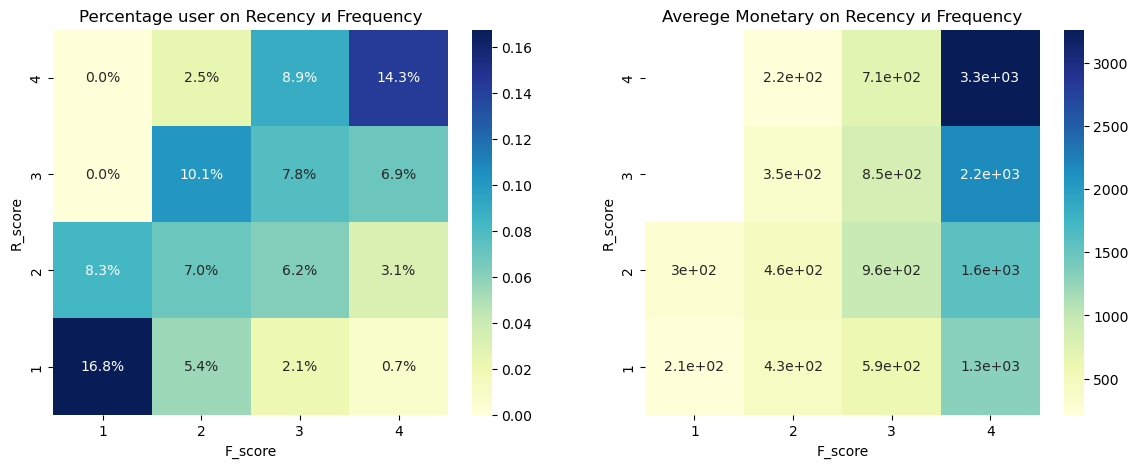

In [46]:
# Построим содную таблицу для тепловой карты с количеством пользователей в группах
RFM_pivot1 = RFM_df.pivot_table(
    index='R_score',
    columns='F_score',
    values='CustomerID',   # отобразим в ячейках количество пользователей в каждой группе
    aggfunc='count',      
    observed=False  )       # показывать только те категории F_score - которые присутствуют в данных
total_customer = RFM_pivot1.sum().sum() # общее количество пользователей
customer_pivot = RFM_pivot1/total_customer

# Построим содную таблицу для тепловой карты со средним доходом от пользователя в группе
RFM_pivot2 = RFM_df.pivot_table(
    index='R_score',
    columns='F_score',
    values='Monetary',   
    aggfunc='mean',      
    observed=False  ) 

# Строим тепловые карты
fig, axis = plt.subplots(1, 2, figsize=(14, 5)) # определяем фигуру и ее размеры
sns.heatmap(customer_pivot, annot=True, cmap='YlGnBu', fmt='.1%', ax=axis[0]) # непосредственно сама карта со значениями в ячейках
axis[0].set_title('Percentage user on Recency и Frequency')                   # подпись графика
sns.heatmap(RFM_pivot2, annot=True, cmap='YlGnBu', ax=axis[1])                # второй heatmap
axis[1].set_title('Averege Monetary on Recency и Frequency')
plt.show()

In [ ]:
'''
В целом, мы получили сегменты пользователей которые в зависимости от бизнес задач можно использовать по разному.
Много пользователей в группе R=1 F=1 M=1 - пользователи покупали давно, мало, и не дорого - для магазина подарков вполне норма,
тратить бюджет на их привлечение может быть не оправдано, но таких пользователей чуть больше чем лидеров - 444
Самые лояльные и прибыльные пользователи R=4 F=4 M=4 - покупали недавно, много, дорого - таким клиентам можно делать спец предложения,
присваивать статус "особых" клиентов, это основная база приносящая стабильный доход.
Группы R=3 F=3 M=1,2,3,4 - вероятно следует как то напомнить им о себе, клиенты покупали относительно недавно и много, их можно
попытаться перевести в группу более дорогих покупок и регулярных.
Можно также обратить внимание на группу R=2 F=3,4 M=2 - покупают много, но давно, и с небольшой прибылью, можно подумать о их возвращении
Группы R=1,2 F=4 M=4 - покупали много и дорого, но давноне заходили, их тоже нужно как то реактивировать''' 

In [ ]:
'''
Группа R=3 F=3 и R=2 F=3 - приносят сравнительно неплохой доход, хорошие объемы, при этом количество пользователей в этих группах вместе 14%
А давность визитов средняя и ниже средней. Можно посмотреть на характер их возвращаемости - Retention'''

In [47]:
# Выбираем из нашего RFM, только пользователей с оценками 33[3,4], 23[3,4]
RFM_group = RFM_df.loc[RFM_df['RFM_Segment'].str.contains(r'33[3,4]|23[3,4]', regex=True), ['CustomerID', 'RFM_Segment']]

In [48]:
# Из первичного датафрема берем копию
all_users = df_retail[['CustomerID', 'InvoiceDate']].copy()

# Добавляем столбец с датой по неделям
all_users['week'] = all_users['InvoiceDate'].dt.to_period('W').dt.to_timestamp()

# Удаляем лишний столбец
all_users = all_users.drop('InvoiceDate', axis=1)

# Удаляем дубли, т.к. нам нужные уникальные даты активности каждого пользователя
all_users = all_users.drop_duplicates(subset=['CustomerID', 'week'])

# Соединяем пользователей 33[3,4], 23[3,4] с таблицей где все даты активности, получим нужных нам пользователей и их даты активности
retention_df = RFM_group.merge(all_users, on='CustomerID', how='inner')

In [49]:
retention_df.head()

,CustomerID,RFM_Segment,week
0,12840,234,2011-04-25
1,12840,234,2011-05-09
2,12840,234,2011-06-06
3,12840,234,2011-07-18
4,16807,233,2011-03-14


In [50]:
# Получим для каждого пользователя дату первой активности как новый столбец, а сам датафрейм оставим не сгруппированным
retention_df['start_week'] = retention_df.groupby('CustomerID')['week'].transform('min')

# Добавим столбец с количеством полныx недель между фактической и стартовой датой в неделях
retention_df['week_number'] = ((retention_df['week'] - retention_df['start_week'])//pd.Timedelta(weeks=1)).astype(int)

# Приведем значение RFM_Segment к числовому для удобства филтраци
retention_df['RFM_Segment'] = retention_df['RFM_Segment'].astype(int)

In [51]:
retention_df.head()

,CustomerID,RFM_Segment,week,start_week,week_number
0,12840,234,2011-04-25,2011-04-25,0
1,12840,234,2011-05-09,2011-04-25,2
2,12840,234,2011-06-06,2011-04-25,6
3,12840,234,2011-07-18,2011-04-25,12
4,16807,233,2011-03-14,2011-03-14,0


In [52]:
# Считаем количество пользователей в каждой когорте при этом фильтруя по группам RFM
retention_RF_23 = (retention_df.loc[retention_df['RFM_Segment']<300]
                               .groupby(['start_week', 'week_number'], as_index=False)
                               .agg(count=('CustomerID', 'nunique'))   )
retention_RF_33 = (retention_df.loc[retention_df['RFM_Segment']>300]
                               .groupby(['start_week', 'week_number'], as_index=False)
                               .agg(count=('CustomerID', 'nunique'))   )

In [53]:
# Для каждой группы делаем сводную таблицу 
retention_RF_23 = retention_RF_23.pivot(index='start_week', columns='week_number', values='count')
retention_RF_33 = retention_RF_33.pivot(index='start_week', columns='week_number', values='count')

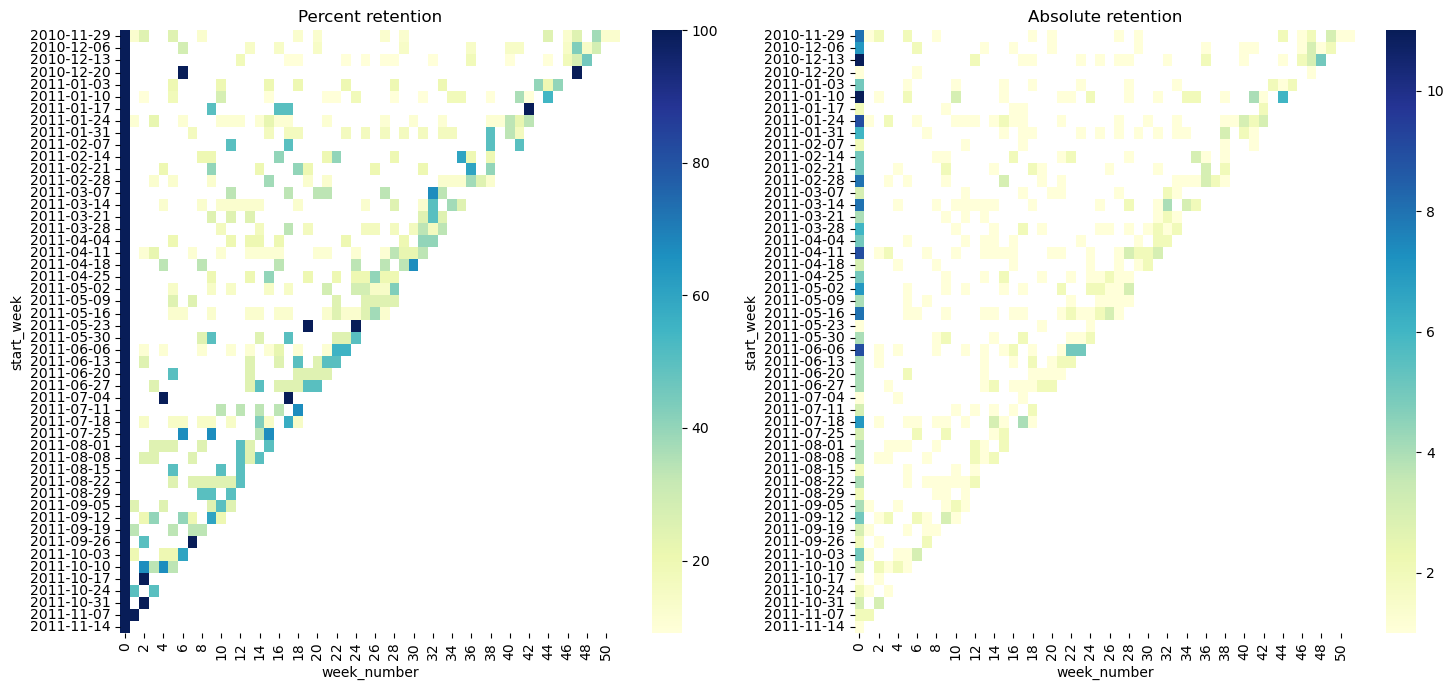

In [54]:
# Строим тепловую катру для группы 333 334
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
retention_percent_33 = retention_RF_33.divide(retention_RF_33[0], axis=0)*100 #делаем относительную оценку в %
sns.heatmap(retention_percent_33, ax=ax[0], cmap='YlGnBu',
            yticklabels=retention_percent_33.index.strftime('%Y-%m-%d')) #редактируем отображение на оси У , переведя даты в строки
ax[0].set_title('Percent retention')

sns.heatmap(retention_RF_33, ax=ax[1], cmap='YlGnBu', yticklabels=retention_RF_33.index.strftime('%Y-%m-%d')) # абсолютная оценка
ax[1].set_title('Absolute retention')
plt.tight_layout()
plt.show()

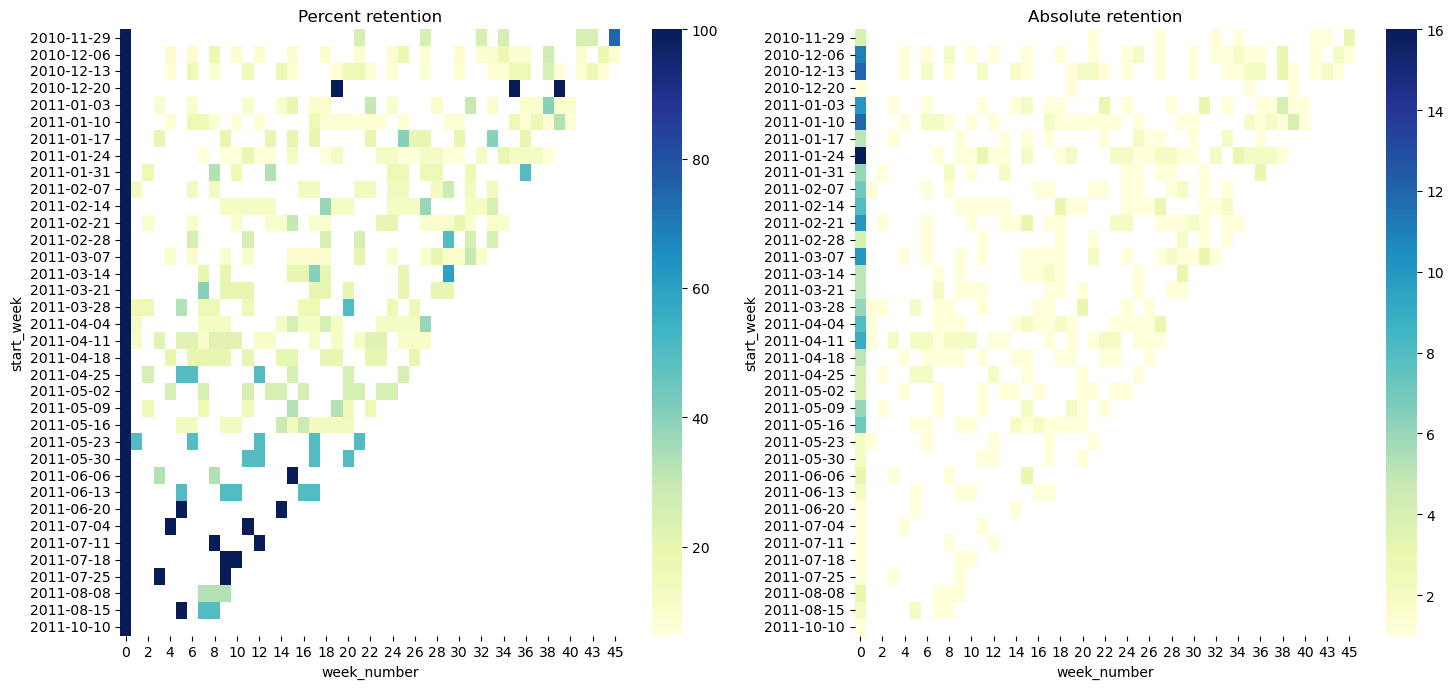

In [55]:
# Строим тепловую карту для группы 233 234
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
retention_percent_23 = retention_RF_23.divide(retention_RF_23[0], axis=0)*100
sns.heatmap(retention_percent_23, ax=ax[0], cmap='YlGnBu', yticklabels=retention_percent_23.index.strftime('%Y-%m-%d'))
ax[0].set_title('Percent retention')

sns.heatmap(retention_RF_23, ax=ax[1], cmap='YlGnBu', yticklabels=retention_RF_23.index.strftime('%Y-%m-%d'))
ax[1].set_title('Absolute retention')
plt.tight_layout()
plt.show()

In [69]:
# Посмотрим на средние цифры в каждой группе
print(f'Среднее значение retention вгруппе 23 - {retention_percent_23.mean().mean()}\n',
    f'Среднее значение retention вгруппе 33 - {retention_percent_33.mean().mean()}')

Среднее значение retention вгруппе 23 - 23.911624124121115
 Среднее значение retention вгруппе 33 - 29.220706853240983


In [ ]:
'''
Как мы видим retention в группе 33 выше на 5% в среднем чем у группы 23 - те кто заходил недавно, более чаще возвращаются.
В целом значение около 30% для магазина подарков довольно хорошо, пользователи возвращаются в принципе, вероятно, эти покупатели 
являются мелкооптовыми покупателями или лояльными клиентами. Также видна неоднородность retention в каждой кагорте - т.е.до 90-100% 
пользователей могут вернуться и через полгода - но эти когорты как видно очень малы по размеру 1-3 пользователя
'''

In [57]:
# Построим график с количеством пользователей которые имеют статус new - в этом месяце есть, в предыдущем нет,
# returned - были в прошлом месяце и в текущем, gone - были в прошлом месяце а в текущем нет.

df_month = df_retail[['InvoiceDate', 'CustomerID']].copy() # берем копию исходных данных
df_month['month'] = df_month['InvoiceDate'].dt.to_period('M').dt.to_timestamp() # делаем столбик с датами по месяцам
df_month = df_month.drop('InvoiceDate', axis=1) # удаляем столбик с датами
df_month = df_month.drop_duplicates().reset_index(drop=True) # делаем пользователей в месяц уникальной комбинацией

In [58]:
# Нам нужны все даты активности каждого пользователя, сгрпупируем а даты положим в список
month_arrau = df_month.groupby('CustomerID', as_index=False).agg(all_date=('month', list))
month_arrau.head()

,CustomerID,all_date
0,12347,"[2010-12-01 00:00:00, 2011-01-01 00:00:00, 201..."
1,12348,"[2010-12-01 00:00:00, 2011-01-01 00:00:00, 201..."
2,12349,[2011-11-01 00:00:00]
3,12350,[2011-02-01 00:00:00]
4,12352,"[2011-02-01 00:00:00, 2011-03-01 00:00:00, 201..."


In [59]:
# К таблице с пользователями по месяцам присоединяем все даты их активности 
df_merge_1 = df_month.merge(month_arrau, on='CustomerID', how='inner')

# Переименуем столбик с месяцами как preveous_month - потому что будем искать сначала ушедших пользователей
df_merge_1 = df_merge_1.rename(columns={'month' : 'preveous_month'})

# Сделаем столбик текущий месяц как сумму preveous_month + 1 для того чтоб проверить - есть ли в списке дат this_month, елсли НЕТ - gone
df_merge_1['this_month'] = df_merge_1['preveous_month'] + pd.DateOffset(months=1)

In [60]:
# Фильтруем - оставляем только пользователей у которых текущего месяца НЕТ в списке активностей, т.е.в этот месяц они - gone
df_merge_1 = df_merge_1.loc[~df_merge_1.apply(lambda row: row['this_month'] in row['all_date'], axis=1), ['CustomerID', 'this_month']] 

In [61]:
# Добавим колонку со статусом, и имеем пользователей и месяца в которых у них статус - gone
df_merge_1['status'] = 'gone'
df_merge_1.head()

,CustomerID,this_month,status
0,17850,2011-01-01,gone
1,13047,2011-01-01,gone
4,17809,2011-01-01,gone
6,16098,2011-01-01,gone
7,18074,2011-01-01,gone


In [62]:
# Собираем данные теперь для пользователей со статусами returned и new
df_merge_2 = df_month.merge(month_arrau, on='CustomerID', how='inner') # берем всех пользователей и присоеденяем все даты активности
df_merge_2 = df_merge_2.rename(columns={'month' : 'this_month'}) # переименовываем колонку дат в текущий месяц
df_merge_2['preveous_month'] = df_merge_2['this_month'] - pd.DateOffset(months=1) # получаем предыдущий месяц как this_month-1

In [63]:
# Напишем функцию которая будет определять статус пользователя
def status(row):
    if row['preveous_month'] in row['all_date']:  # если предыдущий месяц есть в списке активности - returned
        return 'returned'
    else:
        return 'new'                              # если нет - 'new'


In [64]:
# Применяем функцию, и получим столбик со статусом
df_merge_2['status'] = df_merge_2.apply(status, axis=1)

In [65]:
# Оставим только необходимые столбцы
df_merge_2 = df_merge_2[['CustomerID', 'this_month', 'status']]
df_merge_2.head()

,CustomerID,this_month,status
0,17850,2010-12-01,new
1,13047,2010-12-01,new
2,12583,2010-12-01,new
3,14688,2010-12-01,new
4,17809,2010-12-01,new


In [66]:
# Итак у нас два датафрейма с одинаковыми столбцами, содержат всех пользователей их статусы в различные месяца
df_concat = pd.concat([df_merge_1, df_merge_2], axis=0)
df_concat.head()

,CustomerID,this_month,status
0,17850,2011-01-01,gone
1,13047,2011-01-01,gone
4,17809,2011-01-01,gone
6,16098,2011-01-01,gone
7,18074,2011-01-01,gone


In [67]:
# Получаем количество пользователей по месяцам и статусам
df_concat = df_concat.groupby(['this_month', 'status'], as_index=False).agg(count=('CustomerID', 'nunique'))


In [68]:
# Сделаем функцию которая сделает ушедших с отрицательным знаком
def negativ(row):
    return row['count'] * (-1) if row['status'] == 'gone' else row['count']
# Применяем функцию    
df_concat['count'] = df_concat.apply(negativ, axis=1)
df_concat.head()

,this_month,status,count
0,2010-12-01,new,833
1,2011-01-01,gone,-531
2,2011-01-01,new,399
3,2011-01-01,returned,302
4,2011-02-01,gone,-463


In [69]:
# Делаем сводную таблицу для графика
pivot = df_concat.pivot(index='this_month', columns='status', values='count')

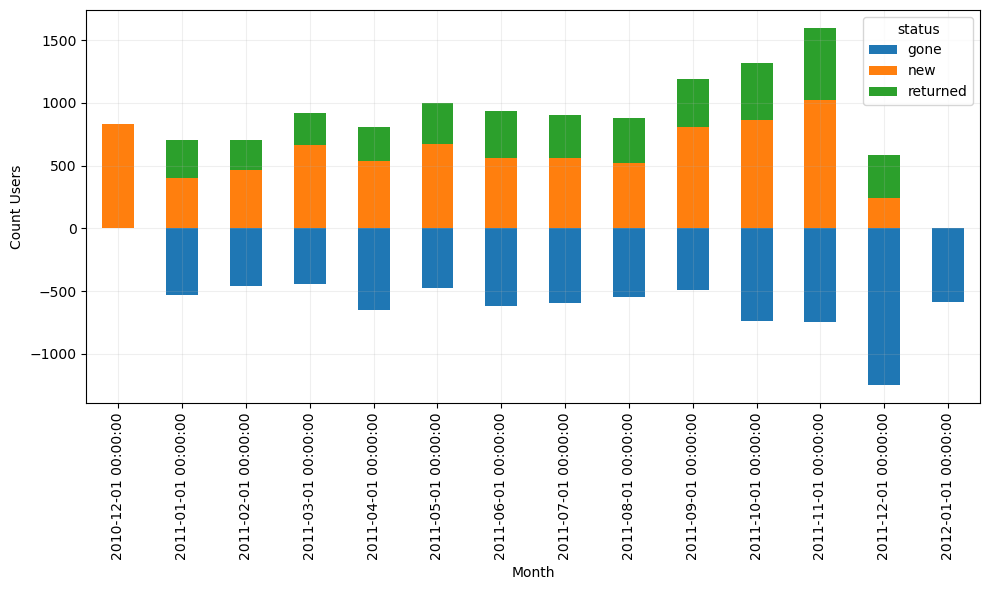

In [70]:
# Строим график
fig, ax = plt.subplots(figsize=(10, 6))
pivot.plot(kind='bar', stacked=True, ax=ax)
plt.xlabel('Month')
plt.ylabel('Count Users')
plt.grid(linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()

In [ ]:
'''
В целом количество пользователей стабильно по месцам, есть приток новых пользователей и хорошая доля вернувшихся.
Учитывая специфику магазина подарков, количество ушедших вполне нормально, ведь пользователеи которые покупают регулярно довольно мало,
 а у нас оценка по отношению к предыдущему месяцу, условно в другие месяца этот пользователь может вернуться как новый.'''